In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [63]:
def get_differential_filter(im):
    # To do
    kernel_x = np.tile(np.array([1,0,-1]),(3,1))
    kernel_y = np.tile(np.vstack(np.array([1,0,-1])),3)
    im = im.astype('float') / 255.0
    im_zero_pad = np.pad(im, ((1,1),(1,1)), 'constant')
    #print(kernel_y)
    filter_x = np.zeros(im.shape)
    filter_y = np.zeros(im.shape)
    
    height,width = im_zero_pad.shape
    
    
    for i in range(1,height-1,1):
        for j in range(1,width-1,1):
            cell = np.array([[im_zero_pad[i-1,j-1],im_zero_pad[i-1,j],im_zero_pad[i-1,j+1]],
                            [im_zero_pad[i,j-1],im_zero_pad[i,j],im_zero_pad[i,j+1]],
                            [im_zero_pad[i+1,j-1],im_zero_pad[i+1,j],im_zero_pad[i+1,j+1]]])
        
            
            filter_x[i-1,j-1] = np.sum(cell*kernel_x)
            filter_y[i-1,j-1] = np.sum(cell*kernel_y)
    
    
    return filter_x, filter_y

In [64]:
im = cv2.imread('einstein.jpg', 0)
filter_x, filter_y = get_differential_filter(im)

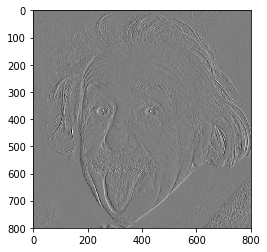

In [65]:
plt.imshow(filter_x,cmap='gray')
plt.show()

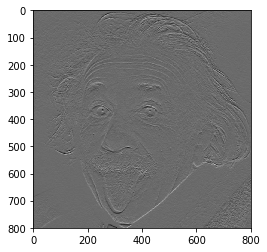

In [66]:
plt.imshow(filter_y,cmap='gray')
plt.show()

2.4901991662787712


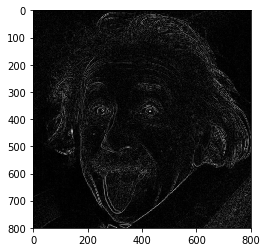

In [67]:
grad_mag = np.sqrt(filter_x*filter_x+filter_y*filter_y)
print(np.max(grad_mag))
plt.imshow(grad_mag,cmap='gray')
plt.show()

3.141592653589793


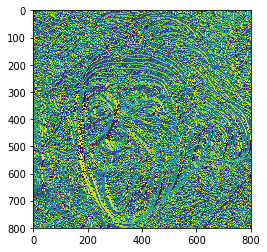

In [68]:
grad_angle = np.zeros(filter_x.shape)
for i in range(filter_x.shape[0]):
    for j in range(filter_x.shape[1]):
        grad_angle[i,j] = np.arctan2(filter_y[i,j],filter_x[i,j])



print(np.max(grad_angle))
#plt.imshow(grad_angle,cmap='gray')
plt.imshow(grad_angle)
plt.show()

In [69]:
print(np.min(grad_angle))

-3.141592653589793


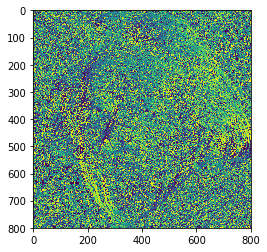

0.0


In [70]:
grad_angle_new = grad_angle % np.pi 
plt.imshow(grad_angle_new)
plt.show()

print(np.min(grad_angle_new))

In [71]:
angle_im = grad_angle_new*180/np.pi

angle_im[np.where(angle_im>=180.0)] = 179.9

oder_im = (angle_im // 15)%11

cell_size = 8

for i in range(6):
    oder_im[np.where(np.logical_and(oder_im>=2*i-1, oder_im<2*i+1))] = i


#print(oder_im[:14,:14])

ori_histo = np.zeros((oder_im.shape[0]//cell_size,oder_im.shape[1]//cell_size,6))

for i in range(oder_im.shape[0]):
    for j in range(oder_im.shape[1]):
    #print(i//cell_size,j//cell_size,oder_im[i,j])
        ori_histo[i//cell_size,j//cell_size,np.int(oder_im[i,j])] =grad_mag[i,j] + ori_histo[i//cell_size,j//cell_size,np.int(oder_im[i,j])]
    


In [72]:
print(grad_mag)

[[0.60179151 0.64314921 0.62805118 ... 0.32309537 0.35847513 0.33871095]
 [0.64906403 0.07492146 0.07940571 ... 0.07399201 0.0968556  0.3540071 ]
 [0.675239   0.04850713 0.06655123 ... 0.06491351 0.06859943 0.37273473]
 ...
 [1.13728195 0.04384447 0.05573596 ... 0.03529412 0.04331514 0.8279062 ]
 [1.13334012 0.0316167  0.07734542 ... 0.0316167  0.02480218 0.8279062 ]
 [1.05653347 1.11378763 1.1033276  ... 0.83944472 0.82837974 0.77366298]]


In [73]:
print(ori_histo[:,:,0].shape)

(100, 100)


In [74]:
eps = 0.001
block_size = 2
    
ori_histo_normalized = np.zeros(((ori_histo.shape[0]-block_size+1),(ori_histo.shape[1]-block_size+1),6,block_size,block_size))
   
for i in range(ori_histo.shape[0]-block_size+1):
    for j in range(ori_histo.shape[1]-block_size+1):
        for m in range(ori_histo.shape[2]):
            #print(ori_histo[i,j,m])
            H_sum = np.sqrt(np.power(ori_histo[i,j,m],2.0)+np.power(ori_histo[i,j+1,m],2.)+np.power(ori_histo[i+1,j,m],2.) +np.power(ori_histo[i+1,j+1,m],2.) + np.power(eps,2))
            ori_histo_normalized[i,j,m,0,0] = ori_histo[i,j,m]/H_sum 
            ori_histo_normalized[i,j,m,0,1] = ori_histo[i,j+1,m]/H_sum   
            ori_histo_normalized[i,j,m,1,0] = ori_histo[i+1,j,m]/H_sum   
            ori_histo_normalized[i,j,m,1,1] = ori_histo[i+1,j+1,m]/H_sum   
                
ori_histo_normalized = ori_histo_normalized.reshape((ori_histo.shape[0]-block_size+1,ori_histo.shape[1]-block_size+1,6*block_size*block_size))
   

In [75]:
print(ori_histo_normalized.shape)
print(ori_histo_normalized[0,0,:])
print(np.max(ori_histo_normalized))

(99, 99, 24)
[0.60385135 0.05192989 0.79321539 0.0589591  0.70199895 0.45707233
 0.2199189  0.49991746 0.56353134 0.23609273 0.22118429 0.76011171
 0.62289179 0.77455447 0.03417783 0.10441761 0.45687566 0.36620526
 0.27155832 0.76381495 0.13589501 0.38283683 0.86852234 0.28396656]
0.9999995168401845


In [76]:
q= np.array([[[[1,3,5],[2,4,6]],[[5,7,9],[8,9,1]]],[[[2,3,5],[7,4,6]],[[5,1,9],[5,9,1]]]])
print(q.shape)
print(q.reshape((2,2,6)))
#print(q.reshape((4,2,3)))

(2, 2, 2, 3)
[[[1 3 5 2 4 6]
  [5 7 9 8 9 1]]

 [[2 3 5 7 4 6]
  [5 1 9 5 9 1]]]


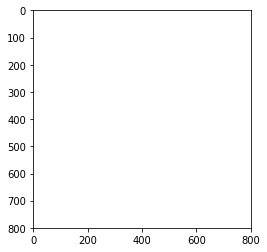

In [79]:
hog = ori_histo_normalized
num_bins = 6
max_len = 7  # control sum of segment lengths for visualized histogram bin of each block
im_h, im_w = im.shape
num_cell_h, num_cell_w = int(im_h / cell_size), int(im_w / cell_size)
num_blocks_h, num_blocks_w = num_cell_h - block_size + 1, num_cell_w - block_size + 1
histo_normalized = hog.reshape((num_blocks_h, num_blocks_w, block_size**2, num_bins))
histo_normalized_vis = np.sum(histo_normalized**2, axis=2) * max_len  # num_blocks_h x num_blocks_w x num_bins
angles = np.arange(0, np.pi, np.pi/num_bins)
mesh_x, mesh_y = np.meshgrid(np.r_[cell_size: cell_size*num_cell_w: cell_size], np.r_[cell_size: cell_size*num_cell_h: cell_size])
mesh_u = histo_normalized_vis * np.sin(angles).reshape((1, 1, num_bins))  # expand to same dims as histo_normalized
mesh_v = histo_normalized_vis * -np.cos(angles).reshape((1, 1, num_bins))  # expand to same dims as histo_normalized
plt.imshow(im, cmap='gray', vmin=0, vmax=1)
for i in range(num_bins):
    plt.quiver(mesh_x - 0.5 * mesh_u[:, :, i], mesh_y - 0.5 * mesh_v[:, :, i], mesh_u[:, :, i], mesh_v[:, :, i],
               color='white', headaxislength=0, headlength=0, scale_units='xy', scale=1, width=0.002, angles='xy')
plt.show()